In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={"figure.figsize":(12,10)})
import warnings
warnings.filterwarnings("ignore")

In [2]:
import random
random.seed(101)


# Loading Data

In [3]:
data=pd.read_csv("titanic_data.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dict_live={
    0:"Died",
    1:"Survived"
}

dict_sex={
    "male":0,
    "female":1
}

data["Bsex"]=data["Sex"].apply(lambda x: dict_sex[x]) #take one by one value and convert it into numerical value


#features
features=data[["Pclass","Bsex"]].to_numpy()
labels=data["Survived"].to_numpy()

## Splitting data

In [5]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,labels,test_size=0.30,random_state=0)

# Multilayer Perceptron

### Activation Function and Derivation

In [41]:
#sigmoid

def Sigmoid(x,derivative=False):
    if derivative==True:
        f=1/(1+np.exp(-x)) * (1- 1/(1+np.exp(-x)))
    else:
        f=1/(1+np.exp(-x))
    return x
       
    
#ReLU

def ReLU(x,derivative=False):
    if derivative==True:
        f=np.heaviside(x,1)
    else:
        f=np.maximum(x,0)
        
    return f

#### Training Model

In [42]:
def train_ANN(xtrain,ytrain,h1_units=4,h2_units=4,learning_rate=0.0015):
    random.seed(101)
    
    #hidden layer 1
    w1=2*np.random.rand(h1_units,xtrain.shape[1])
    b1=np.random.rand(h1_units)
    
    #hidden layer 2
    w2=2*np.random.rand(h2_units,h1_units)
    b2=np.random.rand(h2_units)
    
    #output layer
    w_out=2*np.random.rand(h2_units)
    b_out=np.random.rand(1)
    
    loss=[]
    vec_y=[]
    for i in range(0, xtrain.shape[0]):
        x_data=xtrain[i]
        
        #feed forward
        h1=ReLU(np.dot(w1,x_data)+b1) #hidden layer 1 output
        h2=ReLU(np.dot(w2,h1)+b2) #hidden layer 2 output
        y=Sigmoid(np.dot(w_out,h2)+b_out) #output of the output layer
        
        #back propagation
        delta_out=(y-ytrain[i]*Sigmoid(y,derivative=True))
        delta_2=delta_out*w_out*ReLU(h2,derivative=True)
        delta_1=np.dot(delta_2,w2)*ReLU(h1,derivative=True)
        
        #gradient descent
        w_out=w_out-learning_rate*delta_out*h2 #output layer
        b_out=b_out-learning_rate*delta_out
        
        #hidden layer 2
        w2=w2-learning_rate*np.kron(delta_2,h1).reshape(h2_units,h1_units)
        b2=b2-learning_rate*delta_2
        
        #hidden layer 1
        w1=w1-learning_rate*np.kron(delta_1,x_data).reshape(h1_units,x_data.shape[0])
        b1=b1-learning_rate*delta_1  
        
        #cost
        loss.append((1/2)*(y-ytrain[i])**2)
        vec_y.append(y[0])
        
    batch_loss=[]
    for i in range(0,10):
        loss_avg=0
        for m in range(0,60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
        
    plt.figure(figsize=(10,6))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title("Average loss by epoch")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("loss",fontsize=16)
    
    return w1,b1,w2,b2,w_out,b_out,loss
        

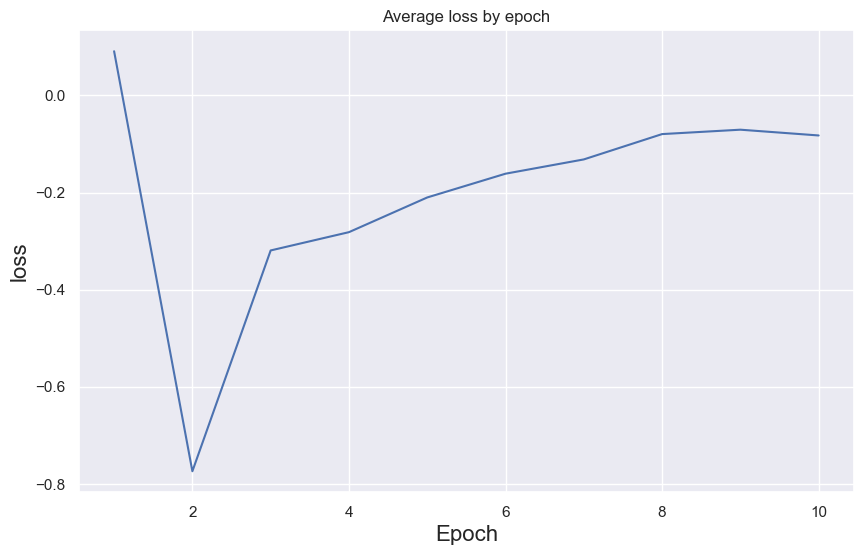

In [43]:
w1,b1,w2,b2,w_out,b_out,loss=train_ANN(xtrain,ytrain)

### Train

In [44]:
def ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out):
    pred=[]
    
    for i in range(0,xtest.shape[0]):
        x=xtest[i]
        
         #feed forward
        z1=ReLU(np.dot(w1,x)+b1) #hidden layer 1 output
        z2=ReLU(np.dot(w2,z1)+b2) #hidden layer 2 output
        y=Sigmoid(np.dot(w_out,z2)+b_out) #output of the output layer
        
        pred.append(np.heaviside(y-0.5,1)[0])
        
    return np.array(pred)
    

In [45]:
prediction=ANN_pred(xtest,w1,b1,w2,b2,w_out,b_out)

In [46]:
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [47]:
ytest

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)